ValueError: too many values to unpack (expected 2)

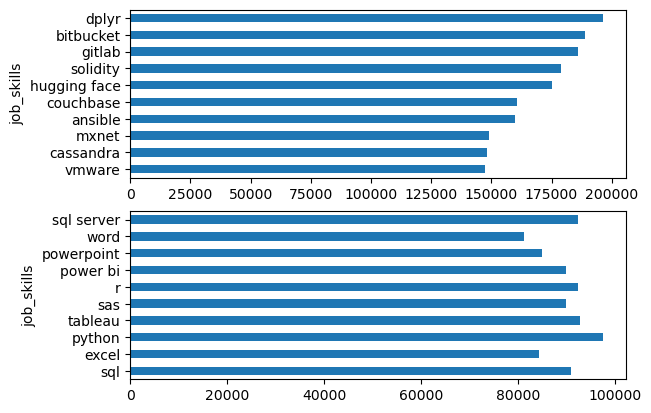

In [19]:
import ast 
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

def to_list(x):
    if pd.notna(x):
        return ast.literal_eval(x)
    else:
        return x

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(to_list)
df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]
df_DA_US = df_DA.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg','job_skills']]

#index by skills
df_DA_US_GRP = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])


#sorted  by to pay
df_DA_top_pay = df_DA_US_GRP.sort_values(by='median',ascending=False).head(10)

#sorted by most demand skills
df_DA_top_skills = df_DA_US_GRP.sort_values(by='count',ascending=False).head(10)



fig,ax = plt.subplots(2,1)

df_DA_top_pay.plot(kind='barh',y='median',ax=ax[0],legend=False)
df_DA_top_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)

sns.barplot(data=df_DA_top_pay, x='median',y=df_DA_top_pay.index,ax=ax[0], hue='median',palette='dark:b_r:')
ax[0].set_title('Highest Paid Data Analyst skills')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'${0:g}k'.format(x/100)))
ax[0].invert_yaxis()

sns.barplot(data=df_DA_top_skills, x='median',y=df_DA_top_skills.index,ax=ax[1])
ax[1].set_title('Most Demand Data Analyst Skills')
# ax[1].set_yticklabels('')
ax[1].set_xlabel('')
ax[1].set_ylabel('Demands Skills')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:'${0:g}k'.format(x/100)))

fig.tight_layout(h_pad=1)


